<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/HandsOnML-AI/blob/master/ML_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are many classification ML algorithms. No algorithm works well in all possible scenarios. choosing the right algorithm requires information about the dataset , pitting multiple sensible models against one another and picking the right one.

Steps involved in machine learning model : \
1. Selecting features and collection of training samples
2. Choosing a performance metric
3. Choosing the classifier and optimization algorithm
4. Evaluation of the model using the metric on the data
5. Finetuning the model

Perceptron and Adaline learning algorithms using sci-kit learn library

In [16]:
#IRIS flowers dataset already available
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,(2,3)] # the petal length and width
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


In [17]:
print('Class labels : ', np.unique(y))

Class labels :  [0 1 2]


We see that the class labels are encoded as integers. Although string labels can be trained using a machine learning algorithm,it is unnecessarily complex with huge memory footprint. It is wiser to integer encode the labels.

To evaluate how well the model performs on unseen data, a portion of training data is set aside as validation data and test data.there are tools in scikit learn to do this as well.


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


the shuffling of data before seggregration into train and test data is taken care of by the sklearn algorithm. the random_state parameters handles the pseudo random number generation. The stratify parameter makes sure that we have the same proportion of y labels as the original dataset in training and test dataset.

In [19]:
print('Counts per label in y', np.bincount(y))
print('Counts per label in y', np.bincount(y_train))
print('Counts per label in y', np.bincount(y_test))


Counts per label in y [50 50 50]
Counts per label in y [35 35 35]
Counts per label in y [15 15 15]


In [20]:
#Feature scaling using scikit-learn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Implementations in scikit learn support multiclass classification - one versus rest(OVR).

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, max_iter=40, random_state=1)

the interface is similar to the perceptron implemented from scratch in previous chapter notebook.it has fit method to train the model and predict method to do forward pass.

In [ ]:
y_preds = ppn.predict(X_test_std)

In [ ]:
y_preds.shape

(45,)

In [ ]:
print("Misclassified samples count is %d" %  (y_test!=y_preds).sum())

Misclassified samples count is 1


the scikit learn library also features a large number of metrics like accuracy to gauge the performance of a classifier. it can be used too for evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy : %0.2f' % accuracy_score(y_test, y_preds))

Accuracy : 0.98


In [ ]:
print("Accuracy : %0.2f" % ppn.score(X_test_std,y_test))

Accuracy : 0.98


In [24]:
#Visualize using plot_decisions function to view the decision boundaries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx = None,resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  print(xx1.min(), xx2.min())
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, class_ in enumerate(np.unique(y)):
    plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')
  if test_idx:
           # plot all samples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='magenta', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

In [ ]:
np.unique(y_test)

array([0, 1, 2])

-2.555787268814562 -2.438387213510368


<ipython-input-32-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


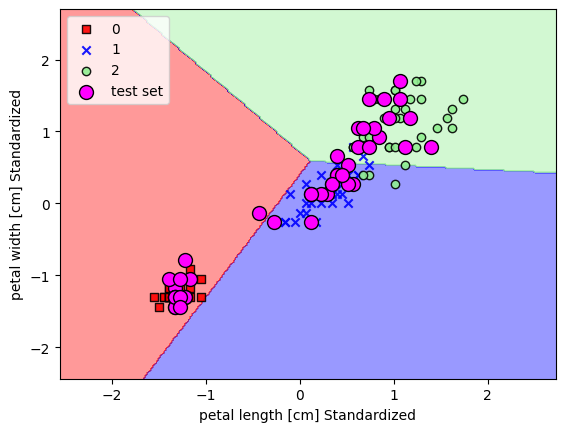

In [ ]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=ppn, test_idx = range(105, 150))
plt.xlabel("petal length [cm] Standardized")
plt.ylabel("petal width [cm] Standardized")
plt.legend(loc='upper left')
plt.show()


Perceptron algorithm never converges on datasets that are not linearly separable. we need to resort to better algorithms for such cases. Even the above dataset containing three classes are not linearly separable. the sklearn uses some additional convergence functionalities to get a decent decision boundary. \
we ll see better algorithms for classification problem.

LOGISTIC REGRESSION

Perceptron will never converge on datasets which have no linearly separable data. So, now, we look at another simple yet powerful algorithm for classification called the logistic regression. \
Similar to perceptron and adaline, logistic regression is another linear model which works well on linearly separable dataset. Also, it can be extended to multi-class classification (OVR).

Odds ratio : the odds in favour of an event. mathematically can be defined as : \
Odds ratio = $\frac{p}{1-p}$, where p is probability of the event happening

The logit function (logarithm of the odds ratio) can then be defined conveniently as :\
logit(p) = $\log{\frac{p}{1-p}}$ \
log refers to natural logarithm.

the logits function takes as input in the range [0,1] and transform it to a value over the entire range of real values. \
logit(p(y=1|x) = $w_0x_0 + w_1x_1 + ... w_nx_n = w^T x$ \
To make a classification prediction, we need to have the opposite effect. So, we use the sigmoid activation function, which is given by : \
$\phi(z) = \frac{1}{1+\exp(-z)}$, where z = $w^T x$


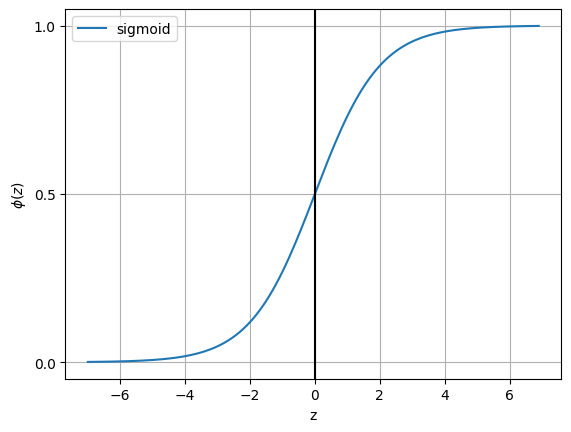

In [8]:
#sigmoid activation
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return (1. / (1+np.exp(-z)))
z = np.arange(-7.0,7.0,0.1)
phi = sigmoid(z)
plt.plot(z,phi, label="sigmoid")
plt.axvline(0.0,  color="black")
plt.xlabel("z")
plt.ylabel("$\phi(z)$")
plt.yticks([0.0,0.5,1.0])
plt.grid(True)
plt.legend()
plt.show()

The difference between logistic regression and adaline is that the activation function used before thresholding in adaline was a identity function $\phi(z) = z $, whereas for logistic function it was $\phi(z) = sigmoid(z)$

The logistic function returns the probability. p(y=class | x,w). Once we have the probability value, we can convert it to binary value of 0 or 1 using binary thresholding : \
   $ \hat{y}=
\begin{cases}
    1 & \text{if } \phi(z) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

With logistic regression,we also have an opportunity to quantify the prediction outcome with the probability values. getting binary prediction outcome along with the confidence score, makes it very popular and useful.

Cost function and learning weights: \
In the previous chapter, this cost function was used - a sum of squared error cost function.
$J(\bf{w}) = \sum\limits_i \frac{1}{2} (\phi (z^{(i)}) - y^{(i)})^{2}$



For the current logistic sigmoid activation function, the cost function which can be minimized using gradient descent is given by : \
$J(\bf{w}) = \sum \limits_{i=1}^{n} \left[ -y^{(i)} log(\phi(z^{(i)})) - (1 - y^{(i)}) log(1 - \phi(z^{(i)})) \right ]$ \
The derivation is not given here. pls refer to personal notebook for derivation. \
The function is basically negative log likelihood function -> it is numerically stable compared to likelihood function. [reduces numerical underflow where likelihood values are very low and escape gradient updates]. Another advantage is that it is easier to work with additions in differential calculus[to update gradients].

If we consider just one instance, the cost function can be simplified as follows: \
   $ J(\bf{w}) =
\begin{cases}
    -log(\phi(z)) & \text{if } y = 1\\
    -log(1-\phi(z)),              & \text y = 0
\end{cases}$

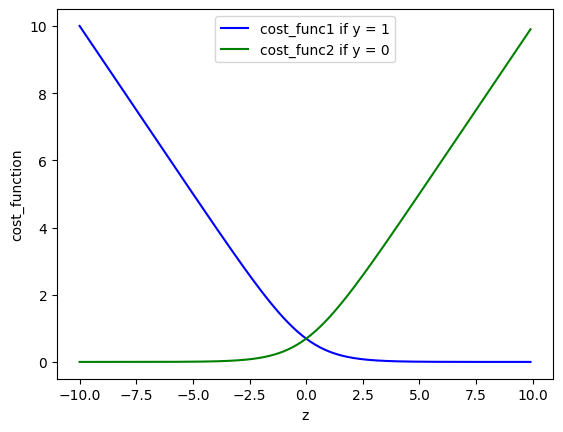

In [10]:
#plot the cost function
def cost_func1(z):
  return -np.log(sigmoid(z))
def cost_func2(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10.0, 10.0, 0.1)
phi_z = sigmoid(z)

c1 = cost_func1(z)
c2 = cost_func2(z)

plt.plot(z, c1, "b-", label = "cost_func1 if y = 1", )
plt.plot(z, c2, "g-",label = "cost_func2 if y = 0")
plt.xlabel("z")
plt.ylabel("cost_function")
plt.legend()
plt.show()


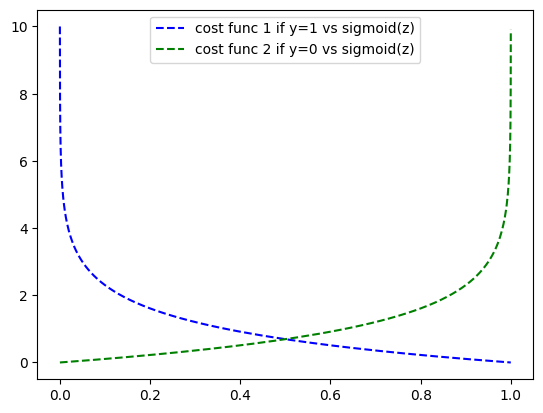

In [12]:
plt.plot(phi_z, c1, "b--", label = "cost func 1 if y=1 vs sigmoid(z)")
plt.plot(phi_z, c2, "g--", label = "cost func 2 if y=0 vs sigmoid(z)")
plt.legend()
plt.show()



In [39]:
#logistic regression training loop + forward pass code
#similar to adaline just the cost function is to be changed and thresholding range is now [0,1]
class LogisticRegressionGD(object):
  """ Logistic Regression for binary classification
  Parameters
  ----------
  eta : float
  Learning rate between 0.0 and 1.0
  n_iter : int
  Number of iterations for training
  random_state : int
  Seed for pseudo-random generator
  Attributes
  ----------
  w_ : 1d-array
  Weights of the model
  cost_ : List
  the cost function values
  """
  def __init__(self, eta = 0.1, n_iter=40, random_state=42):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self, X, target):
    """ Method to update weights based on Gradient Descent algorithm
    Parameters
    ----------
    X : 2-D array
    Input training samples
    target : 1-D array
    Target labels
    """
    self.random_gen = np.random.RandomState(self.random_state)
    self.w_ = self.random_gen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):

      phi = self.activation(self.net_input(X))
      error = target - phi
      self.w_[1:] += self.eta * X.T.dot(error)
      self.w_[0] += self.eta * error.sum()
      cost = -target * np.log(phi) - (1-target) * np.log(1-phi)
      self.cost_.append(cost)
    return self
  def net_input(self,X):
    return self.w_[0] + X.dot(self.w_[1:])
  def activation(self, z):
    return (1/(1+np.exp(-z)))
  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1.0, 0.0)



The above loop works for binary classification, so let us create a data subset with only flowers : iris-setosa and iris-versicolor (classes 0 and classes 1) \



In [34]:
X_train_01_subset = X_train_std[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]


In [40]:
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

-2.555787268814562 -2.438387213510368


<ipython-input-24-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


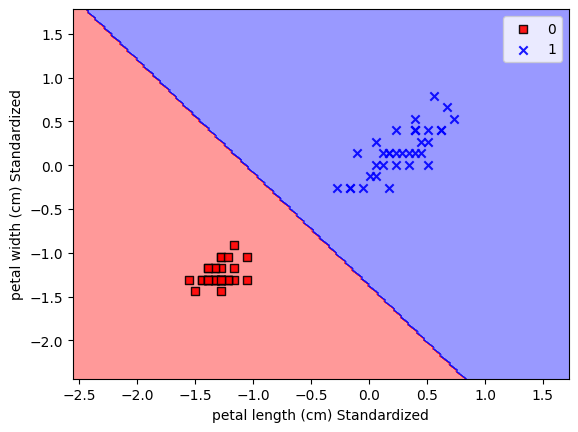

In [41]:
plot_decision_regions(X_train_01_subset, y_train_01_subset, lrgd)
plt.xlabel("petal length (cm) Standardized")
plt.ylabel("petal width (cm) Standardized")
plt.legend()
plt.show()

Using the sklearn logistic regression

-2.555787268814562 -2.438387213510368


<ipython-input-24-55f82349db5b>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


<function matplotlib.pyplot.show(close=None, block=None)>

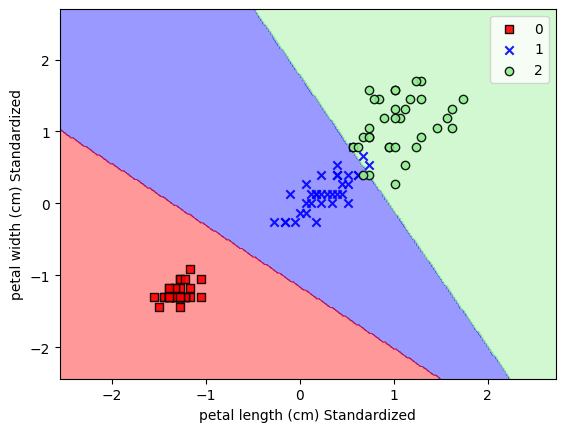

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train) # OvR classification - all the threee classes classified together
plot_decision_regions(X_train_std, y_train, lr)
plt.xlabel("petal length (cm) Standardized")
plt.ylabel("petal width (cm) Standardized")
plt.legend()
plt.show

C in the above class contstruction is hyperparameter related to regularization to curb overfitting.

In [43]:
lr.predict_proba(X_test_std[:5, :]) # method to get 3 class probabilities


array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17],
       [3.79431985e-06, 9.04401285e-01, 9.55949212e-02],
       [5.22212406e-05, 9.94209099e-01, 5.73867966e-03]])

In [44]:
#these are probabilities -> columnwise sum will add up to 1
lr.predict_proba(X_test_std[:5, :]).sum(axis=1)

array([1., 1., 1., 1., 1.])

In [46]:
# to get the index with highest score, call argmax
lr.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 1, 1])

In [47]:
# doing the same with predict method
lr.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1])

sklearn's predict method expects a 2D array, hence if we have 1D array, needs to be reshaped to 2D array before calling predict method.

Overfitting : a common problem observed in machine learning . the model performs well on training data but its performance on unseen data is poor. \
If a model suffers from overfitting, it is usually said that it has high variance meaning there are way too many parameters and the model is too complex for the data.  Similarly if our model is too simple for the dataset,that is there are not enough parameters in the model to learn the patterns in the dataset, it is said to have high bias.

Variance vs bias: \
Variance measures the consistency (or variablity) of the model for a particular instance if the model were to be retrained multiple times on different subsets of the data. A model with high variance [low consistency] is very sensitive to randomness in the data. In contrast bias measures the systematic error in predictions of the model irrespective of the randomness.

One way of solving the bias-variance trade-off is to have a highly complex model and then tune it using regularization. Regularization is higly effective in tackling collinearity - highly correlated features, filter out noise from data and prevent overfitting. Regularization introduces additional information (bias) into model penalizing the weights of the model not allowing it to take extreme values. L2 regularization is one common form of regularization. \
$\frac{\lambda}{2}||\bf{w}||^2 = \frac{\lambda}{2} \sum \limits_{j=1}^{m} w_j^{2}$, where $\lambda$ is the regularization parameter.


The parameter C used in Logistic Regression class comes from support vector machines algorithm actually and is related to the parameter $\lambda$. it is in fact the inverse of the $\lambda$ parameter. through C , we can regulate our model weights and thus control the bias and variance of the model.

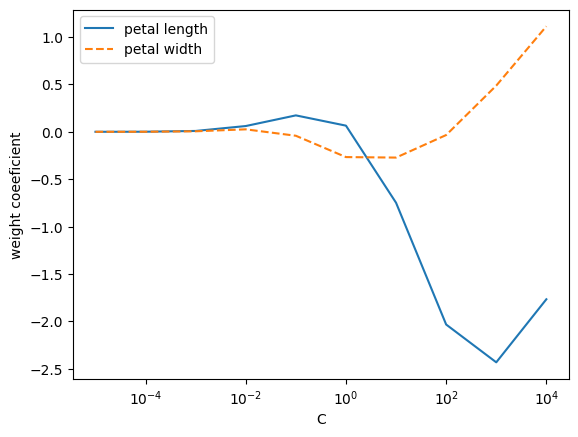

In [49]:
weights, params = [], []
for c in range(-5,5):
  lr = LogisticRegression(C = 10.**c, random_state=1)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], label='petal width', linestyle='--')
plt.ylabel("weight coeeficient")
plt.xlabel("C")
plt.legend(loc="best")
plt.xscale("log")
plt.show()


We ll next see another classification algorithm - Maximum margin classifier a.k.a Support Vector Machines